In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
import seaborn as sns



In [3]:
try:
    from wordcloud import WordCloud
except ModuleNotFoundError:
    import sys
    !{sys.executable} -m pip install wordcloud
    from wordcloud import WordCloud

In [4]:

from nltk.corpus import stopwords

In [5]:
df = pd.read_csv("IPL_Match_Highlights_Commentary.csv", encoding="latin-1")


In [6]:
text_data = df['Commentary'].dropna().str.lower()

In [7]:
def extract_details(commentary):
    bowler = re.findall(r'^(\w+)', commentary)
    batter = re.findall(r'to (\w+)', commentary)
    ball_type = re.findall(r'\b(yorker|bouncer|full toss|length ball)\b', commentary)
    shot_type = re.findall(r'\b(boundary|single|four|six)\b', commentary)
    speed = re.findall(r'\b(\d{3})\b', commentary)  # Assuming speed is a 3-digit number
    runs = re.findall(r'\b(0|1|2|3|4|5|6)\b', commentary)
    
    return [
        bowler[0] if bowler else None,
        batter[0] if batter else None,
        ball_type[0] if ball_type else None,
        shot_type[0] if shot_type else None,
        speed[0] if speed else None,
        runs[0] if runs else None
    ]

In [8]:
# Apply extraction to each commentary
details_df = text_data.apply(extract_details).apply(pd.Series)
details_df.columns = ["Bowler", "Batter", "Ball Type", "Shot Type", "Speed", "Runs Scored"]

In [9]:
# Display extracted table
print(details_df.head())

      Bowler   Batter  Ball Type Shot Type Speed Runs Scored
0      nehra  mandeep       None      four  None        None
1      nehra  mandeep       None      four  None        None
2  henriques    kedar       None      four  None        None
3      nehra    kedar  full toss      four  None        None
4      nehra    kedar       None      four  None        None


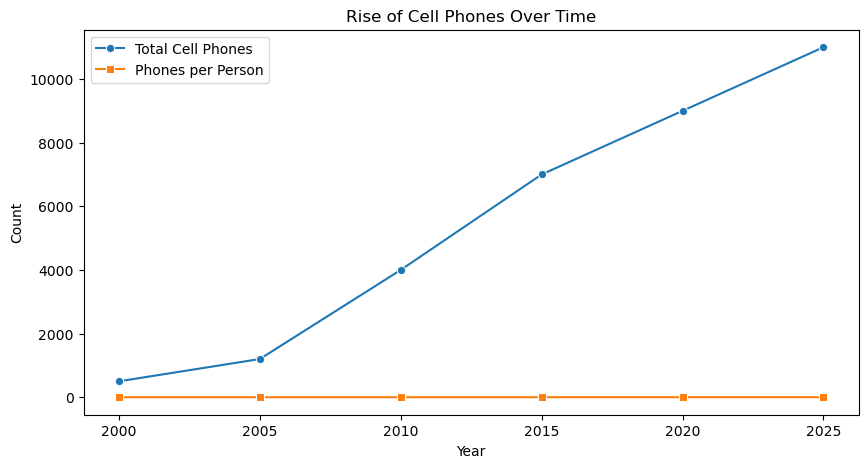

In [10]:
# Line Chart for rise of cell phones
data = {
    'Year': [2000, 2005, 2010, 2015, 2020, 2025],
    'Cell Phones (millions)': [500, 1200, 4000, 7000, 9000, 11000],
    'Phones per Person': [0.1, 0.2, 0.6, 1.0, 1.2, 1.4]
}
chart_df = pd.DataFrame(data)

plt.figure(figsize=(10, 5))
sns.lineplot(x='Year', y='Cell Phones (millions)', data=chart_df, marker='o', label='Total Cell Phones')
sns.lineplot(x='Year', y='Phones per Person', data=chart_df, marker='s', label='Phones per Person')
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Rise of Cell Phones Over Time")
plt.legend()
plt.show()